This notebook will contain my first attempt at entering a Kaggle competition. The task is to predict the sale prices of houses in Ames, Iowa. This first section will be an EDA. Although I am not an expert on real estate, I suspect a few features may be of particular importance in predicting house prices-- these include the size of the house, its location, and the condition it's in. I'm curious in seeing if these features actually have much predictive power and what other features will be important.

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [84]:
prices_df = pd.read_csv(r"\\ion.media\\files\\user\\HomeDir\\NYC\\cseverance\\Desktop\\train.csv")

I want to begin my analysis with the features that I suspect will have a lot to do with the final sales prices of the homes. From the data description, the columns that are of particular interest to me are the following: MSSubClass, MSZoning, LotArea, Neighborhood, Condition1, Condition2, Type of Dwelling, Year Built, to name a few. 

MSZoning deals with the type of area/community the house is located in. From what I know about real estate in NYC, house prices in urban areas cost a lot more per square foot than in suburban or rural areas. If I were to check price per square foot, I suspect that houses will follow a similar pattern in this dataset. A potentially related variable that I will explore is Neighborhood-- it's possible that this will be a more effective location-based feature for describing sales prices.

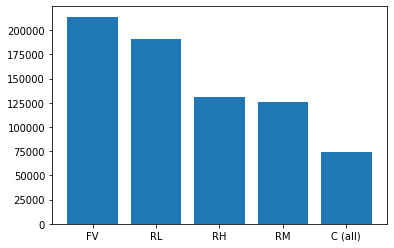

In [85]:
zoning_df = prices_df.groupby('MSZoning')['SalePrice'].agg(['mean', 'count']).reset_index()
zoning_df = zoning_df.sort_values('mean', ascending = False)
zoning_df.columns = ['Zone', 'Average_Price', 'Count']

x = list(zoning_df['Zone'])
y = list(zoning_df['Average_Price'])

plt.bar(x, y)
plt.show()

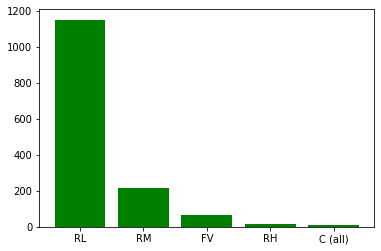

In [86]:
zoning_df = zoning_df.sort_values('Count', ascending = False)
x = list(zoning_df['Zone'])
y = list(zoning_df['Count'])

plt.bar(x, y, color = 'Green')
plt.show()

Houses in a Floating Village Residential zone have the highest sales price, with houses in Residential Low Density zones not far behind. Average prices for medium and high residential density zones are considerably lower, and commercial sales have the lowest prices of all. However, when we look at the number of sales in each zone, the distribution is very uneven. By far, the most sales occur in RL zones, and very few sales occur in the RH and C zones. Since some zones have very few observations, this may not be the best feature to use.

As a potential alternative, I will look at the relationship between average sale price and the neighborhood in which the sale took place.

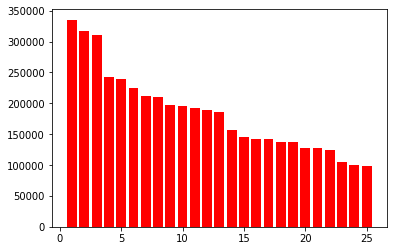

   Neighborhood  Average_Price  Count
0       NoRidge  335295.317073     41
1       NridgHt  316270.623377     77
2       StoneBr  310499.000000     25
3        Timber  242247.447368     38
4       Veenker  238772.727273     11
5       Somerst  225379.837209     86
6       ClearCr  212565.428571     28
7       Crawfor  210624.725490     51
8       CollgCr  197965.773333    150
9       Blmngtn  194870.882353     17
10      Gilbert  192854.506329     79
11       NWAmes  189050.068493     73
12      SawyerW  186555.796610     59
13      Mitchel  156270.122449     49
14        NAmes  145847.080000    225
15      NPkVill  142694.444444      9
16        SWISU  142591.360000     25
17      Blueste  137500.000000      2
18       Sawyer  136793.135135     74
19      OldTown  128225.300885    113
20      Edwards  128219.700000    100
21      BrkSide  124834.051724     58
22       BrDale  104493.750000     16
23       IDOTRR  100123.783784     37
24      MeadowV   98576.470588     17


In [87]:
neighborhood_df = prices_df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'count']).reset_index()
neighborhood_df = neighborhood_df.sort_values('mean', ascending = False).reset_index(drop = True)
neighborhood_df.columns = ['Neighborhood', 'Average_Price', 'Count']
x = [i for i in range(1, len(neighborhood_df) + 1)]
y = list(neighborhood_df['Average_Price'])

plt.bar(x, y, color = 'Red')
plt.show()
print(neighborhood_df)

Collectively, the three neighborhoods of Northridge, Northridge Heights, and Stone Brook have, by far, the highest average sales price for homes. Outside of that cluster, differences in average sale price are much more gradual, with slight dropoffs between Sawyer West and Mitchell, as well as between Brookside and Briardale. I feel like there could be other variables confounding with Neighborhood that may be better to look at closely-- in particular, home sizes could be much larger in the top 3 neighborhoods, and much smaller in the lower priced neighborhoods, and this could be what's really driving the difference. I will explore how houses in each of these neighborhoods differ from each other.

I will see how houses in each of these neighborhoods differ according to YearBuilt, OverallCond, Full Bath, GarageType, etc. To analyze the garage, I am going to create a new variable called Garage-- this will contain a value of 1 if the house has a garage, and a value of 0 if there is no garage.

In [88]:
neighborhood_df = prices_df.groupby('Neighborhood')[['SalePrice','YearBuilt', 'OverallCond', 'FullBath', 'LotArea']].mean()
neighborhood_df = neighborhood_df.sort_values('SalePrice', ascending = False)
print(neighborhood_df)

                  SalePrice    YearBuilt  OverallCond  FullBath       LotArea
Neighborhood                                                                 
NoRidge       335295.317073  1995.439024     5.219512  2.097561  14218.902439
NridgHt       316270.623377  2005.675325     5.000000  2.038961  10887.948052
StoneBr       310499.000000  1998.480000     5.000000  1.920000  10671.920000
Timber        242247.447368  1992.842105     5.131579  1.894737  23664.236842
Veenker       238772.727273  1982.363636     6.272727  1.363636  15606.000000
Somerst       225379.837209  2004.988372     5.034884  1.988372   7840.872093
ClearCr       212565.428571  1966.571429     5.678571  1.607143  30875.750000
Crawfor       210624.725490  1941.549020     6.588235  1.509804  11809.686275
CollgCr       197965.773333  1997.886667     5.240000  1.753333   9619.146667
Blmngtn       194870.882353  2005.235294     5.000000  1.882353   3398.176471
Gilbert       192854.506329  1998.253165     5.126582  1.974684 

A few things stand out to me about the different neighborhoods. First, homes in the most expensive neighborhoods tend to be built more recently, and those in the least expensive neighborhoods tend to be older. Furthermore, homes in the expensive neighborhoods tend to have more bathrooms-- this could indicate that homes in the expensive neighborhoods are larger than homes in the inexpensive neighborhoods.

I need to figure out a way to tell the full square footage of the homes in each of the sales. The issue is that there is no single variable that gives the area of the entire house-- just two separate variables, one for the 1st floor and another for the second floor. I will just add these together to create a column with total area, regardless of the number of floors.

In [89]:
prices_df['Full_Area'] = prices_df['1stFlrSF'] + prices_df['2ndFlrSF']

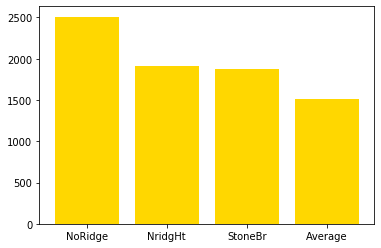

In [90]:
neighborhood_df = prices_df.groupby('Neighborhood')[['SalePrice', 'Full_Area', 'LotArea']].mean()
neighborhood_df = neighborhood_df.sort_values('SalePrice', ascending = False).reset_index()
average_size = prices_df['Full_Area'].mean()

x = list(neighborhood_df['Neighborhood'][0:3])
x.append('Average')
y = list(neighborhood_df['Full_Area'][0:3])
y.append(average_size)

plt.bar(x, y, color = 'Gold')
plt.show()

Looking at the above chart, it's clear that the most expensive neighborhoods have houses that are well above the average home size in the county. Other variables that have to do with the size of a home, such as the number of bathrooms and the number of bedrooms, will probably be correlated with home size. To get a better idea how these variables relate to each other and to the sales price of the homes, I will create a correlation matrix.

<Figure size 720x720 with 0 Axes>

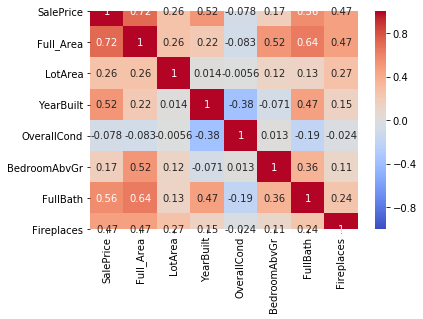

<Figure size 720x720 with 0 Axes>

In [91]:
import seaborn as sns
correlations = prices_df[['SalePrice', 'Full_Area', 'LotArea', 'YearBuilt', 'OverallCond', 'BedroomAbvGr', 'FullBath', 'Fireplaces']]
corr_matrix = correlations.corr()
g = sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", vmin = -1, vmax = 1, center = 0)
plt.figure(figsize = (10, 10))

What stands out immediately is the strong correlation between Full_Area and SalePrice, with r = 0.72. Clearly, larger homes tend to sell for a lot more than smaller homes. It's not immediately clear whether the size of the home is actually causing the homes to sell for much more-- there could be other variables associated with both SalePrice and Full_Area that actually drive the higher sales prices. 

As expected, FullArea is positively correlated with FullBath and BedroomsAbvGr. Since bedrooms and bathrooms are included in the FullArea measurement, it makes sense that higher values for FullArea are associated with higher values for FullBath and BedroomsAbvGr. 

Another factor that will likely have an effect on SalePrice is how the sale occurred-- specifically, this will be captured by the features SaleType and SaleCondition. For instance, sales that were foreclosures will likely have much lower SalePrice than sales that weren't. I will find the mean for each value of SaleType, as well as for each value of SaleCondition. This should give me some indication about how these variables are associated with SalePrice.

In [92]:
sale_type_df = prices_df.groupby('SaleType')['SalePrice'].mean().reset_index()
sale_type_df = sale_type_df.sort_values('SalePrice', ascending = False).reset_index(drop = True)
print(sale_type_df)

  SaleType      SalePrice
0      New  274945.418033
1      Con  269600.000000
2      CWD  210600.000000
3    ConLI  200390.000000
4       WD  173401.836622
5      COD  143973.255814
6    ConLw  143700.000000
7    ConLD  138780.888889
8      Oth  119850.000000


In [93]:
sale_condition_df = prices_df.groupby('SaleCondition')['SalePrice'].mean().reset_index()
sale_condition_df = sale_condition_df.sort_values('SalePrice', ascending = False).reset_index(drop = True)
print(sale_condition_df)

  SaleCondition      SalePrice
0       Partial  272291.752000
1        Normal  175202.219533
2        Alloca  167377.416667
3        Family  149600.000000
4       Abnorml  146526.623762
5       AdjLand  104125.000000


For SaleType, sales of new houses and contracts with 15% down payment and regular terms tend to have the highest price. For SaleCondition, SalePrice tends to be highest for Partial sales and, as expected, lowest for abnormal sales (which include foreclosures) and adjacent land sales. It's important to note that Partial sales are associated with new houses, so there could be some confounding there that I may have to take into account later.

Before I risk getting bogged down with the details and failing to see the forest through the trees, I will create a preliminary model with a few features that I think will be important. For now, I will select these features off my preliminary EDA and admittedly limited intuition about real estate. The model will serve as a benchmark that I can improve with better feature engineering. 

The features that I will select are Full_Area, YearBuilt and LotArea. 

In [94]:
#Selecting features for preliminary model
y = prices_df['SalePrice']
features = ['Full_Area', 'YearBuilt', 'LotArea']
x = prices_df[features]

print(x.describe())

         Full_Area    YearBuilt        LotArea
count  1460.000000  1460.000000    1460.000000
mean   1509.619178  1971.267808   10516.828082
std     521.163523    30.202904    9981.264932
min     334.000000  1872.000000    1300.000000
25%    1123.750000  1954.000000    7553.500000
50%    1458.000000  1973.000000    9478.500000
75%    1775.250000  2000.000000   11601.500000
max    5642.000000  2010.000000  215245.000000


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

#Train-Test Split
train_x, val_x, train_y, val_y = train_test_split(x, y,random_state = 0)

#Creating and fitting the model
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(train_x, train_y)
predictions = rf_model.predict(val_x)
print(mean_absolute_error(val_y, predictions))

24875.74391578437


Now I will train the model on all of the sales data that I have. Then I will read in 

In [96]:
#Fitting the model on all sales data available
rf_full_model = RandomForestRegressor(random_state = 1)
rf_full_model.fit(x, y)

C:\Users\cseverance\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [97]:
#Reading in the test data
test_df = pd.read_csv(r"\\ion.media\\files\\user\\HomeDir\\NYC\\cseverance\\Desktop\\test.csv")
test_df['Full_Area'] = test_df['1stFlrSF'] + test_df['2ndFlrSF']

#Creating test_x, with just the features that I want for the preliminary model
test_x = test_df[features]

#Using model to make predictions based on the test data
test_predictions = rf_full_model.predict(test_x)

output = pd.DataFrame({'Id': test_df.Id,
                       'SalePrice': test_predictions})

In [ ]:
#Creating a file for submission
output.to_csv(r"\\ion.media\\files\\user\\HomeDir\\NYC\\cseverance\\Desktop\\house_prices_first_submission.csv")

This first submission had a score of 0.21320, and was ranked 3588 out of 4631 at the time (22.52 percentile). To improve this score, I will add more features to the model and use feature engineering.

To start, I want to include Building Type since, based on my understanding of the data, the type of building should contain useful information about the price of the sale. I will use one hot encoding to make the Building Type column usable.

In [102]:
#Selecting features for 2nd iteration model
y = prices_df['SalePrice']
features = ['Full_Area', 'YearBuilt', 'LotArea', 'BldgType', 'MSZoning']
x = prices_df[features]

#Train-Test Split
train_x, val_x, train_y, val_y = train_test_split(x, y,random_state = 0)

In [103]:
from sklearn.preprocessing import OneHotEncoder

#Specifying the columns on which I want to use one hot encoding
columns_to_encode = ['BldgType', 'MSZoning']

#Creating encoded columns
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoded_cols_train = pd.DataFrame(encoder.fit_transform(train_x[columns_to_encode]))
encoded_cols_train.index = train_x.index
encoded_cols_val = pd.DataFrame(encoder.fit_transform(val_x[columns_to_encode]))
encoded_cols_val.index = val_x.index

#Getting numerical columns
num_cols_train_x = train_x[['Full_Area', 'YearBuilt', 'LotArea']]
num_cols_val_x = val_x[['Full_Area', 'YearBuilt', 'LotArea']]

#Combining the numerical cols and encoded cols to get the final train and valid sets
encoded_train_x = pd.concat([encoded_cols_train, num_cols_train_x], axis = 1)
encoded_val_x = pd.concat([encoded_cols_val, num_cols_val_x], axis = 1)

In [104]:
print(encoded_train_x.describe())

                 0            1            2            3            4  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000   
mean      0.840183     0.021918     0.033790     0.029224     0.074886   
std       0.366604     0.146482     0.180771     0.168510     0.263327   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  \
count  1095.000000  1095.000000  1095.000000  1095.000000  1095.000000   
mean      0.008219     0.040183     0.012785     0.797260     0.141553   
std       0.090328     0.196477     0.112399     0.402224     0.348750   
min       0.000000     0.000000     0

In [105]:
#Creating and fitting the model
rf_second_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf_second_model.fit(encoded_train_x, train_y)
predictions = rf_second_model.predict(encoded_val_x)
print(mean_absolute_error(val_y, predictions))

24059.121922374427


A few things to point out about this second interation model. First, increasing the n_predictors parameter for the random forest model caused MAE to go down quite a bit. I'm not sure what the best argument for n_predictors is, but 100 is certainly better than 10. In the next notebook where I build upon this model with further EDA and feature engineering, I will also explore what the best value for n_estimators is in this case (and also how to select n_estimators). 

The other thing I want to point out is that adding Building Type also brought down MAE quite a bit. 